# Исследование рынка заведений общественного питания Москвы

**Цель исследования**: Поиск инвесторов для открытия оригинального кафе в Москве. 

Для достижения цели нам необходимо произвести анализ на основе данных о заведениях общественного питания Москвы, который убедит инвестров в успешности открытия такого кафе.   

**Содержание исследования**:

<a href='#1'> 1. Загрузка данных и поготовка их к анализу</a>

<a href='#2'> 2. Анализ данных</a> 

<a href='#3'> 3. Общий вывод</a>

<a href='#4'> 4. Презентация для инвесторов</a>

<a id='1'></a>
## Загрузка данных и поготовка их к анализу

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [13]:
#открытие данных
rest = pd.read_csv('C:/Users/User//datasets/rest_data.csv')

In [14]:
#просмотр данных
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [15]:
#проверка типа данных
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [16]:
#поиск пропущенных значений 
rest.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [17]:
#поиск дубликатов по столбцам
rest.duplicated(subset = ['object_name', 'address']).sum()

207

In [23]:
#удаление найденных дубликатов
rest = rest.drop_duplicates(subset=['object_name', 'address']). reset_index (drop = True)

**Вывод** 

Тип данных для каждой колонки соответствующий, пропусков и полных дубликатов в данных нет. Но были обнаружены заведения с одинаковым названием и адресом. Так могло произойти в связи с увеличением количества посадочных мест, но по сути заведение осталось тем же, соответственно их можно считать неявными дубликатами и для дальнейшего анализа их использовать не будем. 

<a id='2'></a>
## Анализ данных

**Содержание анализа данных:** 

<a href='#2.1'> 2.1 Соотношение видов объектов общественного питания по количеству</a>   

<a href='#2.2'> 2.2 Cоотношение сетевых и несетевых заведений по количеству</a> 

<a href='#2.3'>2.3 Доля сетевых заведений для каждого вида объекта общественного питания </a> 

<a href='#2.4'>2.4 Распределение сетевых заведений в разрезе количества посадочных мест </a> 

<a href='#2.5'>2.5 Определение среднего количества посадочных мест для каждого вида объекта общественного питания </a> 

<a href='#2.6'>2.6 Изучение географического расположения объектов общественного питания </a> 

<a href='#2.7'>2.7 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания </a> 

<a id='2.1'></a>
### Cоотношение видов объектов общественного питания по количеству

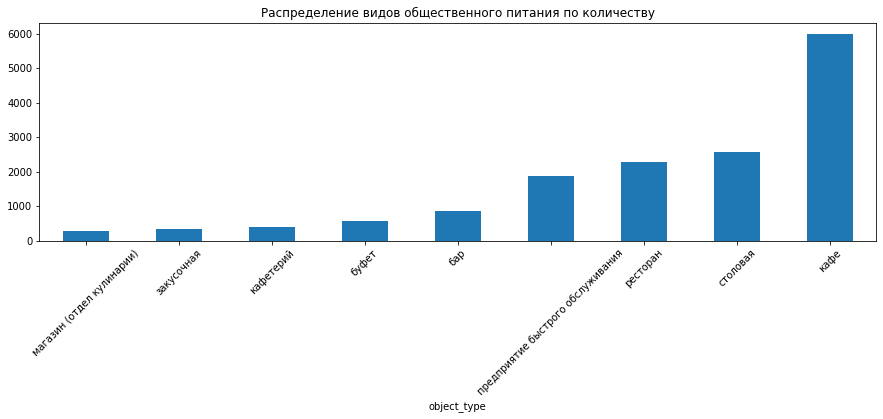

In [25]:
#создаем сводную таблицу по столбцу 'object_type' для подсчета количества заведений каждого вида
rest_pivot_obj_type = rest.pivot_table(index = 'object_type', aggfunc = 'count', values = 'id' ).sort_values(by = 'id')
rest_pivot_obj_type.plot(
    kind = 'bar', title = 'Распределение видов общественного питания по количеству', legend = False, figsize = (15,4))
plt.xticks(rotation=45);

Больше всего среди видов объектов общественного питания кафе, второе и третье место занимают столовые и рестораны соответственно.

<a id='2.2'></a>
### Cоотношение сетевых и несетевых заведений по количеству

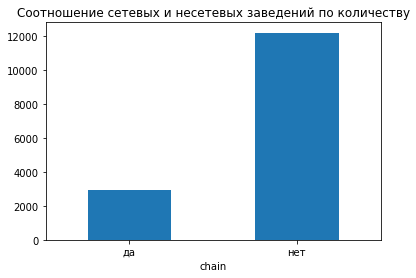

In [26]:
#создаем сводную таблицу для подсчета сетевыхи несетевых заведений
rest_pivot_chain = rest.pivot_table(index = 'chain', aggfunc = 'count', values = 'id' )
rest_pivot_chain.plot(kind = 'bar', title = 'Соотношение сетевых и несетевых заведений по количеству', legend = False)
plt.xticks(rotation=360);

В представленных данных преобладают несетевые заведения. Их количество в 4 раза больше чем сетевых.

<a id='2.3'></a>
### Доля сетевых заведений для каждого вида объекта общественного питания

Для того, чтобы ответить на данный вопрос, нам необходимо отобрать среди данных сетевые заведения и посчитать их долю в общем количестве для каждого вида объекта общественного питания 

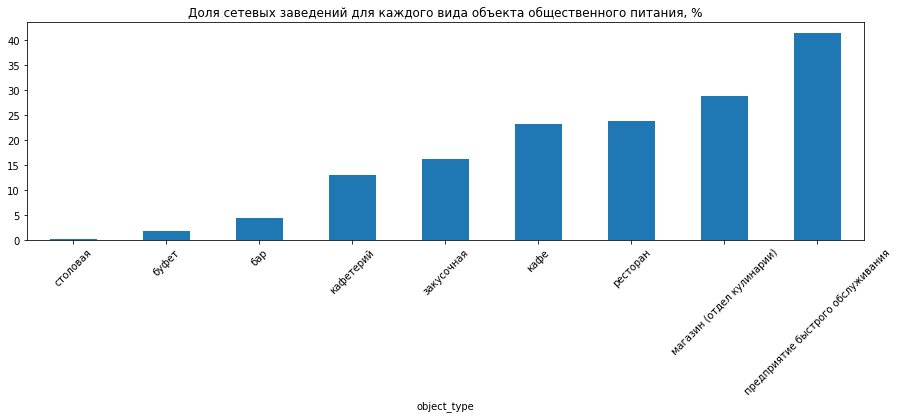

In [27]:
#создаем общую сводную таблицу для сетевых заведений в разрезе видов объектов 
rest_obj_type_chain = rest.query(
    'chain == "да"').pivot_table(index = 'object_type', aggfunc = 'count', values = 'id')
rest_obj_type = rest_obj_type_chain.merge(rest_pivot_obj_type, on = 'object_type').rename(
    columns = {'id_x' : 'chain_object', 'id_y' : 'total'})
rest_obj_type ['rate_chain_object'] = round(rest_obj_type['chain_object']/rest_obj_type['total']*100, 1)
rest_obj_type = rest_obj_type.sort_values(by = 'rate_chain_object')
rest_obj_type ['rate_chain_object'].plot(
    kind = 'bar', title = 'Доля сетевых заведений для каждого вида объекта общественного питания, %', legend = False, figsize = (15,4))
plt.xticks(rotation=45);

Чаще всего сетевыми заведениями являются предприятия быстрого обслуживания, отделы кулинарии, рестораны.

<a id='2.4'></a>
### Распределение сетевых заведений в разрезе количества посадочных мест

Для начала сохраним данные по сетевым заведениям в новую переменную 

In [28]:
rest_chain = rest.query('chain == "да"') 
rest_chain.head()

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


Среди названий есть неявные дубликаты. Их достаточно много и изменить все будет невозможно, поэтому избавимся от дубликатов только для самых популярных заведений. Для начала приведем все значения к нижнему регистру и с помощью собственной функции, создав новый столбец, перезапишем названия заведений.

In [29]:
#игнорируем предупреждение 
import warnings
warnings.simplefilter(action='ignore', category=Warning)
#приводим к нижнему регистру названия
rest_chain['object_name'] = rest_chain['object_name'].str.lower()
rest_chain.head()

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [30]:
#создание собственной функции 
def rename (row):
    if 'kfc' in row:
            return 'kfc' 
    if 'starb' in row or 'старб' in row:
            return 'starbucks'
    if 'шоколад' in row:
            return 'шоколадница'
    if 'макд'in row:
            return 'макдоналдс'
    if 'king' in row or 'кинг' in row:
            return 'бургер кинг'
    return row

rest_chain['name'] = rest_chain['object_name'].apply(rename)
rest_chain.head()

,id,object_name,chain,object_type,address,number,name
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,алло пицца
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,суши wok
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,тануки


In [31]:
rest_chain_id = rest_chain.pivot_table(index = 'name', values = 'id', aggfunc =  'count').sort_values(by = 'id')
rest_chain_id

,id
name,
beverly hills diner,1
кафе «суши сет»,1
кафе «суши вок»,1
кафе «суши wok»,1
кафе «сим-сим»,1
...,...
теремок,93
бургер кинг,158
макдоналдс,169


Предполагаю, что заведение может считаться сетевым, если количество таких заведение хотя бы достигает двух. В нашей сводной таблице присутствуют объекты общественного питания в единственном числе. Это связано с тем, что название может быть записано по-разному. Для ответа на текущий вопрос такие данные для нас будут нерепрезентативными, поэтому от них необходимо избавиться.

In [32]:
rest_chain_id = rest_chain_id.query('id > 1') 
rest_chain_id

,id
name,
ресторан «территория»,2
обжорный ряд,2
пицца пипони,2
ресторан «ёрш»,2
павлин-мавлин,2
...,...
теремок,93
бургер кинг,158
макдоналдс,169


Для каждой сети заведений найдем среднее значение посадочных мест 

In [33]:
rest_chain_number = rest_chain.pivot_table(index = 'name', values = 'number', aggfunc = 'median')
rest_chain_number

,number
name,
beverly hills diner,88.0
bierloga,75.0
black & white,40.0
bocconcino,68.0
boobo,46.0
...,...
ямми микс,2.0
ян примус,300.0
японский ресторан «ваби-саби»,155.0


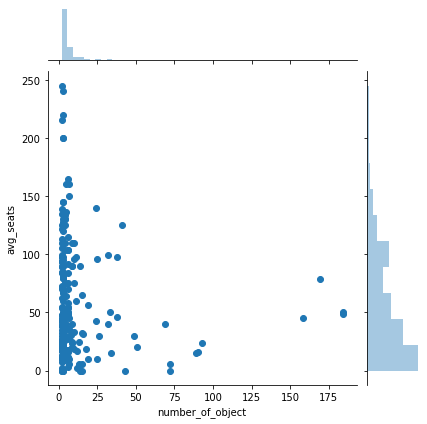

In [34]:
#создание общей сводной таблицы 
rest_chain_pivot = rest_chain_number.merge(rest_chain_id, on = 'name').sort_values(by = 'id', ascending = False).rename(
    columns = {'number' : 'avg_seats', 'id' : 'number_of_object'})
#построение графика взаимосвязи количества заведений в сети и среднего количества мест 
sns.jointplot(x='number_of_object', y='avg_seats', data=rest_chain_pivot,); 

Исходя из графика можно сказать, что для сетевых заведений характерно мало заведений с большим количеством посадочных мест

<a id='2.5'></a>
### Определение среднего количества посадочных мест для каждого вида объекта общественного питания

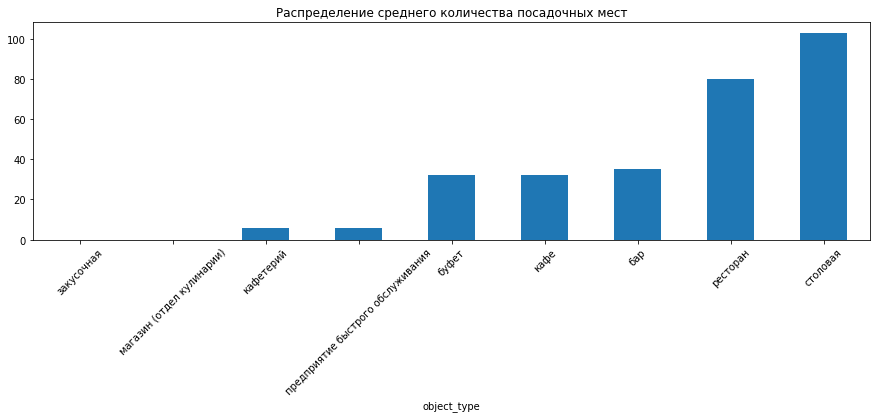

In [35]:
#создание сводной таблицы для видов объектов заведений со средним числом посадочных мест 
rest.pivot_table(index = 'object_type', values = 'number', aggfunc = 'median').sort_values(by = 'number').plot(
    kind='bar', title = 'Распределение среднего количества посадочных мест', legend = False, figsize = (15,4))
plt.xticks(rotation=45);

В столовых и в ресторанах в среднем самое большое количество посадочных мест. А в закусочных и в отделах кулинарии посадочные места чаще всего не предполагаются. 

<a id='2.6'></a>
### Изучение географического расположения объектов общественного питания 

Для того, чтобы определить топ-10 улиц по количеству объектов общественного питания, выделим улицу из столбца address и сохраним ее в новом столбце street с помощью собственной функции.

In [36]:
#собственная функция для созадния столбца с названиями улиц
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'проспект', 'переулок', 'тракт', 'линия', 'магистраль']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
rest['street'] = rest['address'].apply(get_street)
rest['street'] = rest['street'].str.strip()

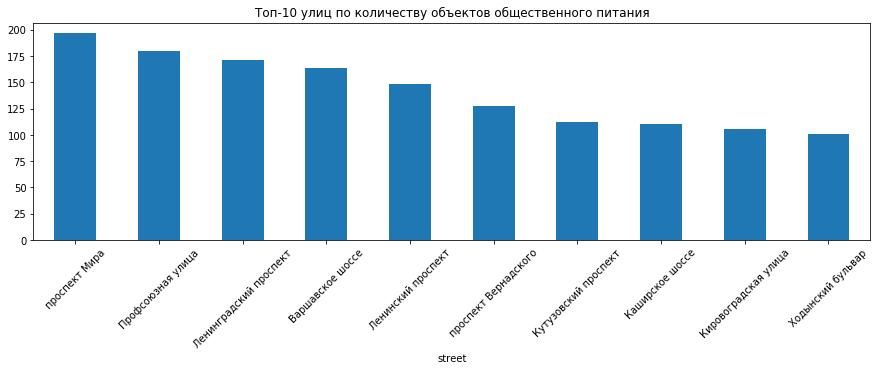

In [37]:
#ТОП-10 улиц по количеству объектов общественного питания
rest_street_top_10 = rest.pivot_table(
    index = 'street', values = 'id', aggfunc = 'count').sort_values( by = 'id', ascending = False).head(10)
rest_street_top_10.plot(
    kind='bar', title = 'Топ-10 улиц по количеству объектов общественного питания', legend = False, figsize = (15,4))
plt.xticks(rotation=45);

Для того, чтобы  ответить на вопрос в каких районах Москвы больше всего объектов общественного питания, нам необходимо загрузить дополнительные данные

In [38]:
#импорт внешних данных по районам Москвы
from io import BytesIO
import requests

spreadsheet_id = '1UX8FOrw3fpFLsbxNfw2sGnyyjbKS7kbSTKUSCC7WMXo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df = df[['street', 'district']]
df.head()

,street,district
0,1-й Ирининский переулок,Басманный район
1,2-й Ирининский переулок,Басманный район
2,3-й Ирининский переулок,Басманный район
3,Иркутская улица,район Гольяново
4,1-й Иртышский проезд,район Гольяново


In [39]:
#объединение данных по районам с ТОП-10 улицами 
rest_street_top_10.merge(df, on = 'street', how = 'left').drop(columns =['id'], axis = 1).groupby(
    'district').agg('count').sort_values(by = 'street', ascending = False).head(10)

,street
district,
район Нагатино-Садовники,2
Хорошёвский район,2
район Тропарёво-Никулино,2
район Тёплый Стан,2
район Чертаново Северное,2
район Чертаново Центральное,2
район Проспект Вернадского,2
район Чертаново Южное,2
Обручевский район,2


Улицы с высокой концентрацией объектов общественного питания достаточно крупные, поэтому одновременно входят сразу в несколько райнов. В объединенной таблице можно выделить районы - лидеры, сгруппировав данные по районам и посчитав количество улиц, которые в них входят.  

Можно предположить, что в этих районах будет сложнее справиться с конкуренцией или же найти свободное помещение для аренды. 

В связи с этим целесообразно найти районы, в которых точек общественного питания не так много.

In [40]:
#объединение данных по районам с улицами с одним объектом питания
one_rest = rest.pivot_table(index = 'street', values = 'id', aggfunc = 'count').rename(columns ={'id':'total_rest'})
one_rest = one_rest[one_rest['total_rest'] == 1]
(one_rest.merge(df, on = 'street', how ='left')
 .drop(columns =['total_rest'], axis = 1).groupby('district').agg('count').sort_values(by = 'street').head(10)
)

,street
district,
район Филёвский Парк,1
район Ивановское,1
район Западное Дегунино,1
район Чертаново Северное,1
район Чертаново Южное,1
район Восточный,1
район Савёлки,1
район Левобережный,1
район Лианозово,1


В этих районах концентрация объектов общественного питания меньше, а следовательно конкуренция будет намного меньше.

<a id='2.7'></a>
### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания 

In [41]:
#сводная таблица по улицам с большим количеством заведений и их средним количеством посадочных мест
rest_street_top_10_number = rest.pivot_table(index = 'street', values = 'number', aggfunc = ['count', 'median']) 
rest_street_top_10_number.columns = ['total_rest', 'avg_number']
                      
rest_street_top_10_number = rest_street_top_10_number.sort_values(by = 'total_rest', ascending = False).head(10) 
rest_street_top_10_number

,total_rest,avg_number
street,,
проспект Мира,197,45.0
Профсоюзная улица,180,25.0
Ленинградский проспект,171,40.0
Варшавское шоссе,164,30.0
Ленинский проспект,148,45.0
проспект Вернадского,127,40.0
Кутузовский проспект,112,41.0
Каширское шоссе,110,25.0
Кировоградская улица,106,30.0


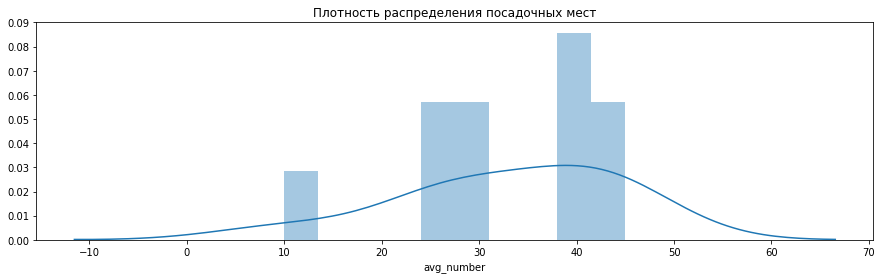

In [42]:
#построение плотности распределения посадочных мест
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize = (15,4))
ax = sns.distplot(rest_street_top_10_number ['avg_number'], bins = 10)
plt.title('Плотность распределения посадочных мест')
plt.show();

<a id='3'></a> 
## Общий вывод


    1. Самыми популярными объектами общественного питания стали кафе, столовые и рестораны
    2. Количество несетевых объектов общественного питания в 4 раза больше сетевых
    3. Для предприятий быстрого обслуживания, отделов кулинарии, ресторанов характерно сетевое распространение 
    4. Также для сетевых заведений характерно мало заведений с большим количеством посадочных мест
    5. В столовых и в ресторанах в среднем самое большое количество посадочных мест
    6. При выборе расположения будущего объекта общественного питания необходимо обратить внимание на район, поскольку есть районы с высокой концентрацией объектов общественного питания, а значит с высоким уровнем конкуренции. Для молодого бизнеса будет достаточно трудно сразу справиться с такой задачей. В таком случае стоит обратить внимание на районы с редким расположением заведений общественного питания. 
    7. Также для сетевых заведений, находящихся на улицах с большим количеством объектов общественного питания, характерно в среднем от 25 до 45 посадочных мест.

<a id='4'></a> 
## Презентация для инвесторов

Ссылка на презентацию: 
    https://disk.yandex.ru/i/NnmMqkgr6CBtAQ